In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('datasets/Mall_Customers.csv', index_col=0)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
data = data.drop('Gender', axis=1)
data = data.drop('Age', axis=1)
data.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


In [5]:
data = data.sample(frac=1)

In [6]:
k_means = KMeans(n_clusters=2)
k_means.fit(data)

KMeans(n_clusters=2)

In [8]:
k_means.labels_
np.unique(k_means.labels_, return_counts=True)

(array([0, 1], dtype=int32), array([ 45, 155]))

In [9]:
centers = k_means.cluster_centers_
centers

array([[90.95555556, 27.44444444],
       [51.73548387, 56.80645161]])

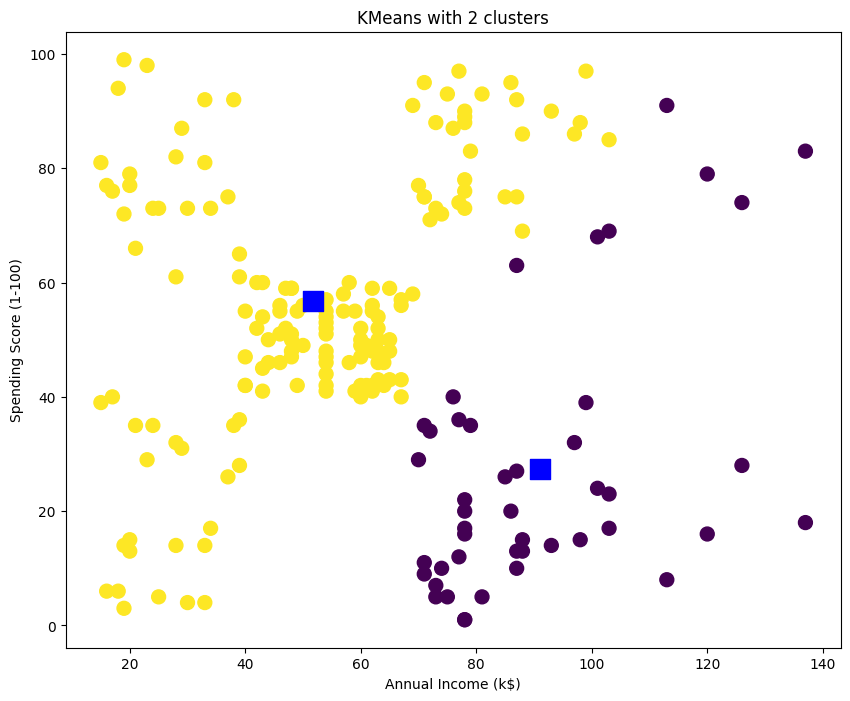

In [10]:
plt.figure(figsize=(10, 8))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=k_means.labels_, s=100)
plt.scatter(centers[:, 0], centers[:, 1], color='blue', marker='s', s=200)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('KMeans with 2 clusters') 
plt.show()

In [ ]:
# measure how similar are the data points within the same cluster and how different are the data points in different clusters
from sklearn.metrics import silhouette_score
score = silhouette_score(data, k_means.labels_)
print('Silhouette Score:', score)

Silhouette Score: 0.38686885991849024


In [12]:
k_means = KMeans(n_clusters=5)
k_means.fit(data)

KMeans(n_clusters=5)

In [13]:
k_means.labels_
np.unique(k_means.labels_, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([35, 81, 22, 39, 23]))

In [14]:
centers = k_means.cluster_centers_
centers

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

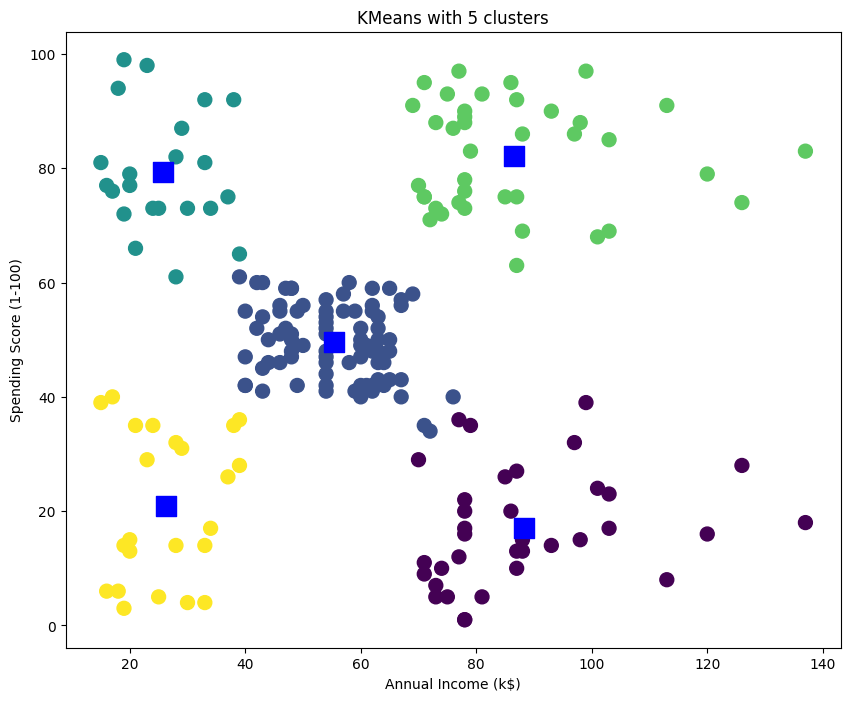

In [16]:
plt.figure(figsize=(10, 8))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=k_means.labels_, s=100)
plt.scatter(centers[:, 0], centers[:, 1], color='blue', marker='s', s=200)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('KMeans with 5 clusters') 
plt.show()

In [17]:
from sklearn.metrics import silhouette_score
score = silhouette_score(data, k_means.labels_)
print('Silhouette Score:', score)

Silhouette Score: 0.553931997444648
